In [1]:
# this makes the notebook expand to full width of the browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/3r/1l2rv1917tldb56rvy1tqh0m0000gq/T/ipykernel_17609/242637077.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
%%javascript

// turn off scrollable windows for too large output
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%load_ext autoreload
%autoreload 2


import os, sys
import datetime
import random
from typing import List
import copy
import gzip

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

root_path = os.path.realpath('../..')
print(root_path)

# this assumes that all of the following files are checked in the same directory
sys.path.append(os.path.join(root_path,"wise-pizza"))

# create data-related directories
data_dir = os.path.realpath(os.path.join(root_path, 'wise-pizza/data'))
if not os.path.isdir(data_dir):
    os.mkdir(data_dir)
print(data_dir)

from wise_pizza import explain_levels, explain_changes_in_totals, explain_changes_in_average

# False if you want nice interactive plots
# True if you want static plots
plot_is_static = False

/Users/Renos.Karamanis/Documents/GitHub
/Users/Renos.Karamanis/Documents/GitHub/wise-pizza/data


In [4]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [5]:
df = pd.read_csv(os.path.join(data_dir, "synth_data.csv"))  # replace this variable with your data
dims = ['TYPE', 'REGION', 'FIRST_PRODUCT', 'CURRENCY']  # dimensions to find segments
totals = 'VOLUME'  # value to analyze
size = 'TRANSACTION_COUNT'  # number of objects

months = sorted(df.COHORT_MONTH.unique())  # unique months in the dataset

data = df[df.COHORT_MONTH == months[-1]]  # take the last month
pre_data = df[df.COHORT_MONTH == months[-2]]  # take the penultimate month

data.tail().T

,17514,17515,17516,17517,17518
COHORT_MONTH,2021-10-01,2021-10-01,2021-10-01,2021-10-01,2021-10-01
TYPE,bank_partnerships,seo_content,affiliates,paid_search,owned_partners
REGION,REGION 5,REGION 7,REGION 4,REGION 3,REGION 4
FIRST_PRODUCT,BANK CARD,ADD MONEY,ADD MONEY,ADD MONEY,BANK CARD
CURRENCY,NOK,EGP,NOK,KGS,BDT
VOLUME,2269.178515,2611.306968,2388.99726,1528.398037,2861.989602
TRANSACTION_COUNT,8,3,48,10,2
VOLUME_STD,266.651533,14.265691,115.158365,220.480347,61.113971


In [6]:
from wise_pizza.tree import decision_tree_simple

regressor = decision_tree_simple(
    dim_df=data,
    feature_cols=dims,
    target_cols=[totals],
    max_depth=3
)

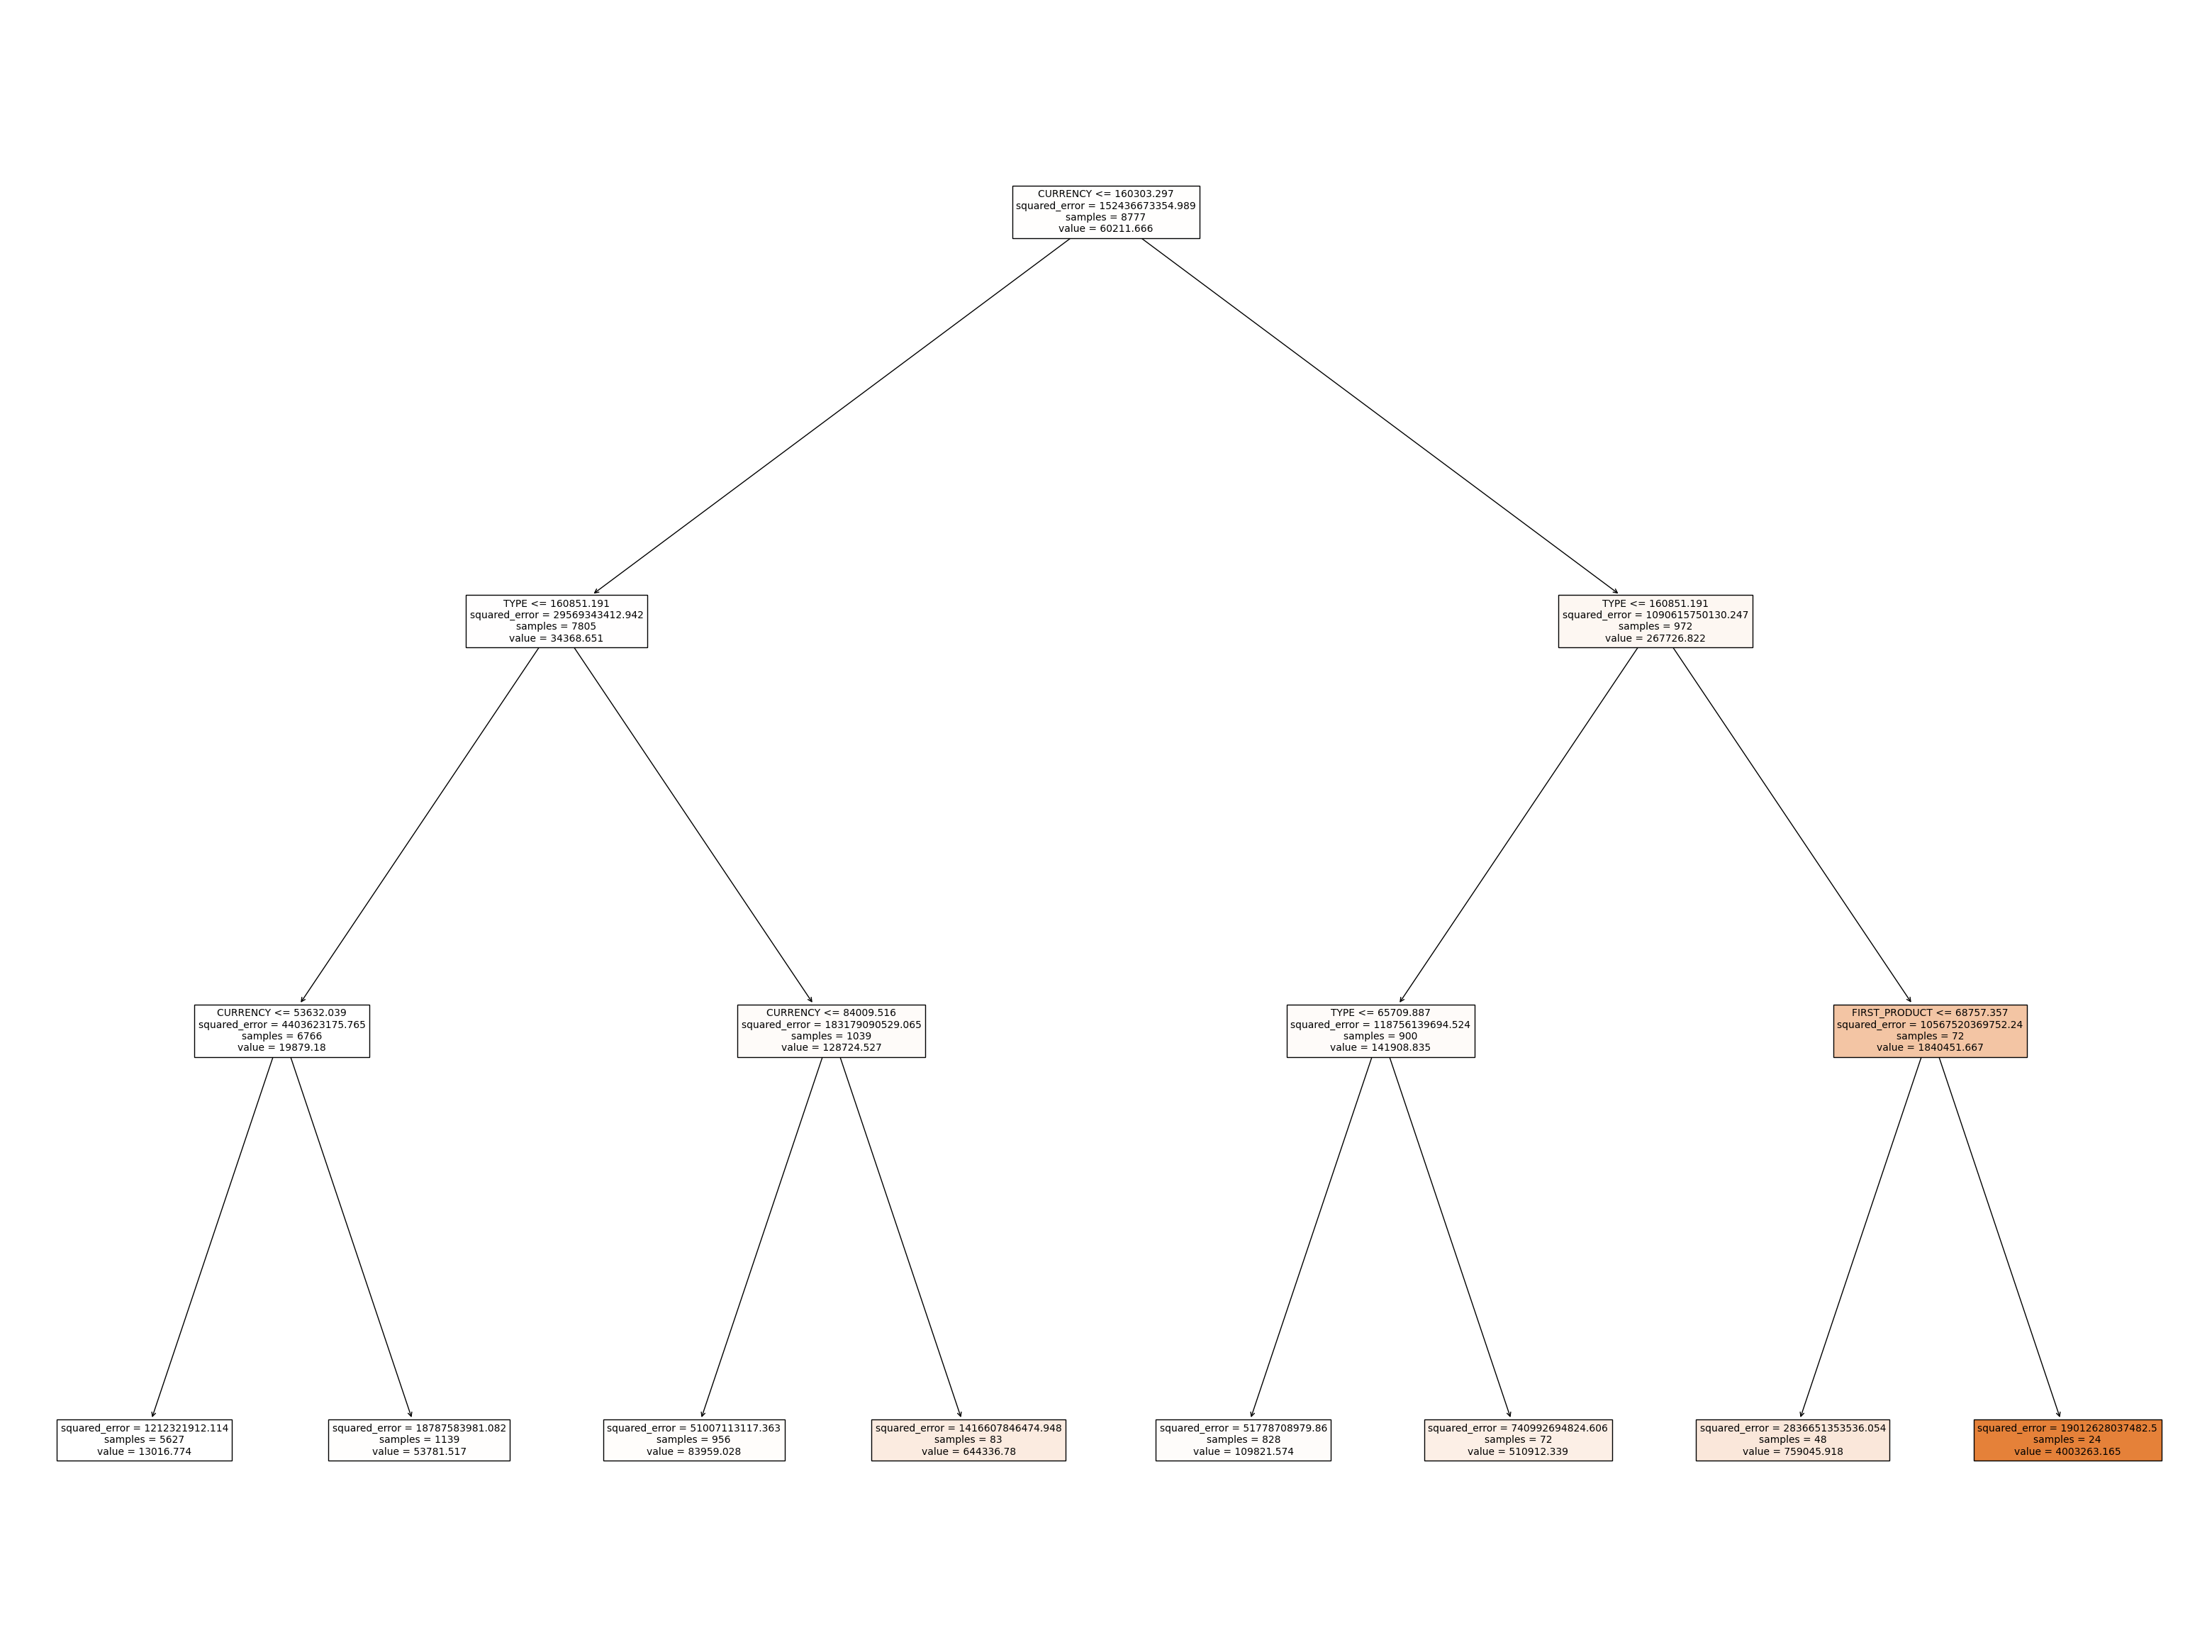

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(40,30))
plot_tree(regressor, feature_names=dims, filled=True, fontsize=10)
plt.show()

In [10]:
from wise_pizza.tree import extract_nodes

nodes = extract_nodes(regressor)